In [380]:
# Under-five deaths	Prevalence of HIV, total (% of population ages 15-49); Mortality rate, adult, female (per 1,000 female adults) - Rwanda	Life expectancy at birth, total (years); Immunization, measles (% of children ages 12-23 months)

In [381]:
# IMPORTING LIBRARIES
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [382]:
# IMPORTING DATASET
dataset = pd.read_excel("Under-five deaths.xlsx")
dataset.head(2)

,Time period,Under-five deaths,"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, adult, female (per 1,000 female adults) - Rwanda","Life expectancy at birth, total (years)","Immunization, measles (% of children ages 12-23 months)"
0,1990-06,48073,2.8,426.406,48.431,83
1,1991-06,51293,3.3,457.505,46.519,89


In [383]:
# MAKE TIME PERIOD THE DATETIME TYPE
dataset["Time period"] = pd.to_datetime(dataset["Time period"])
dataset.head(2)

,Time period,Under-five deaths,"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, adult, female (per 1,000 female adults) - Rwanda","Life expectancy at birth, total (years)","Immunization, measles (% of children ages 12-23 months)"
0,1990-06-01,48073,2.8,426.406,48.431,83
1,1991-06-01,51293,3.3,457.505,46.519,89


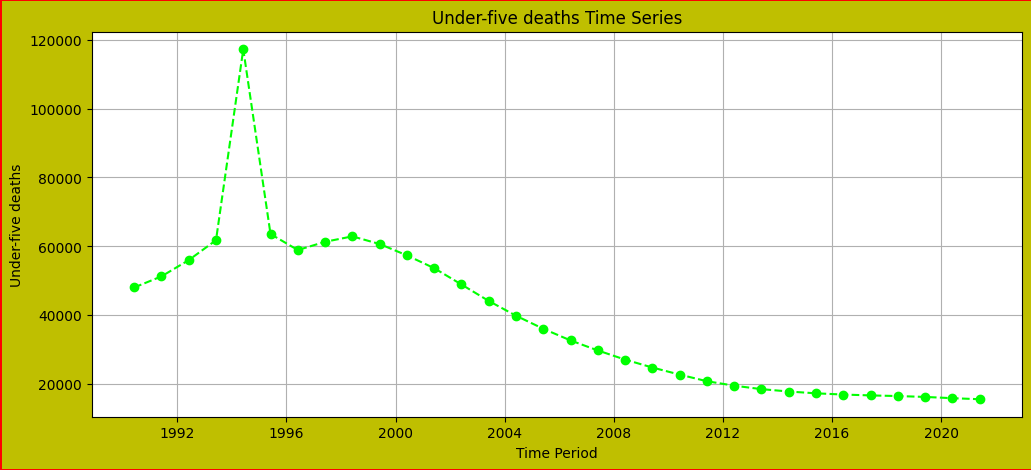

In [384]:
# DEATH UNDER FIVE YEARS TIME SERIES
dataset.set_index("Time period", inplace=True)

# PLOT THE TIME SERIES
plt.figure(figsize=(12, 5), edgecolor="r", facecolor="y", linewidth=1)
plt.plot(dataset["Under-five deaths"], color="lime", marker="o", linestyle="--")
plt.xlabel("Time Period")
plt.ylabel("Under-five deaths")
plt.title("Under-five deaths Time Series")
plt.grid(True)
plt.show()

In [385]:
# TARGET VARIABLE AND FEATURE VARIABLES
target = "Under-five deaths"
dataset.columns
features = [
    "Prevalence of HIV, total (% of population ages 15-49)",
    "Mortality rate, adult, female (per 1,000 female adults) - Rwanda",
    "Life expectancy at birth, total (years)",
    "Immunization, measles (% of children ages 12-23 months)",
]

X = dataset[features]
y = dataset[target]

# SPLITTING THE DATASET INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING THE MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# MAKING PREDICTIONS
y_pred = model.predict(X_test)

# MODEL EVALUATION
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Get the coefficients (weights) and corresponding feature names
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients and their respective feature names
feature_importance = pd.DataFrame(
    {"Feature": feature_names, "Coefficient": coefficients}
)

# Sort the features based on their absolute coefficient values (importance)
feature_importance["Absolute Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(
    by="Absolute Coefficient", ascending=False
)

# Display the feature importance
print(feature_importance)

Mean squared error: 7450250.05
Coefficient of determination: 0.97
                                             Feature  Coefficient  \
0  Prevalence of HIV, total (% of population ages...  1731.410855   
2            Life expectancy at birth, total (years) -1679.403575   
3  Immunization, measles (% of children ages 12-2...  -199.923388   
1  Mortality rate, adult, female (per 1,000 femal...    -5.356599   

   Absolute Coefficient  
0           1731.410855  
2           1679.403575  
3            199.923388  
1              5.356599  


In [386]:
# REMOVE ROW OF THE YEAR 1994 FROM THE DATASET AND CONSIDER IMPORTANT FEATURES ONLY: Life expectancy at birth, total (years) & Mortality rate, adult, female (per 1,000 female adults) - Rwanda
dataset_no_94 = dataset.drop(index="1994-06-01", axis=0)
dataset_no_94 = dataset_no_94.drop(
    [
        "Mortality rate, adult, female (per 1,000 female adults) - Rwanda",
    ],
    axis=1,
)
dataset_no_94.head()

,Under-five deaths,"Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Immunization, measles (% of children ages 12-23 months)"
Time period,,,,
1990-06-01,48073,2.8,48.431,83
1991-06-01,51293,3.3,46.519,89
1992-06-01,56021,3.7,44.319,82
1993-06-01,61798,4.1,42.166,74
1995-06-01,63589,4.6,39.969,84


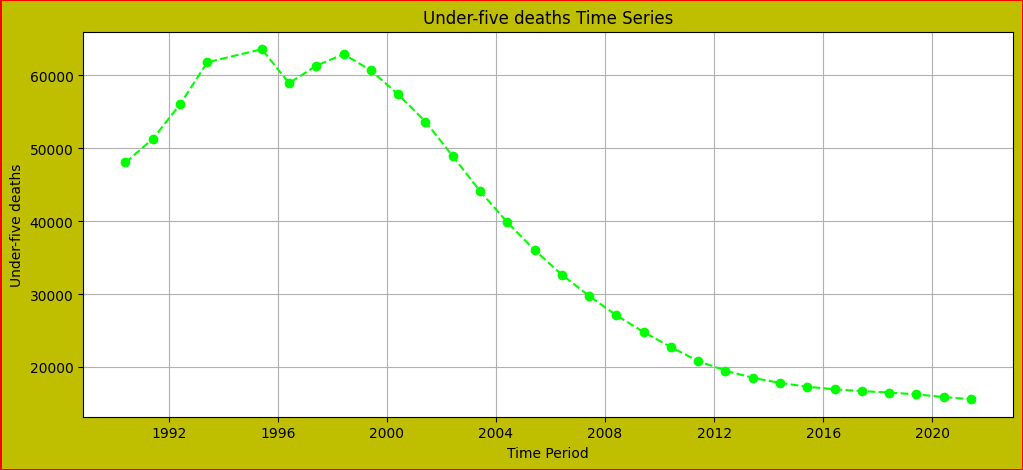

In [387]:
# TIME SERIES PLOT OF THE NEW DATASET
plt.figure(figsize=(12, 5), edgecolor="r", facecolor="y", linewidth=1)
plt.plot(dataset_no_94["Under-five deaths"], color="lime", marker="o", linestyle="--")
plt.xlabel("Time Period")
plt.ylabel("Under-five deaths")
plt.title("Under-five deaths Time Series")
plt.grid(True)
plt.show()

In [388]:
# MODEL TRAINING USING THE NEW DATASET WITHOUT THE YEAR 1994 AND WITH IMPORTANT FEATURES ONLY
# TARGET VARIABLE AND FEATURE VARIABLES
target = "Under-five deaths"
features = [
    "Prevalence of HIV, total (% of population ages 15-49)",
    "Life expectancy at birth, total (years)",
    "Immunization, measles (% of children ages 12-23 months)",
]

X = dataset_no_94[features]
y = dataset_no_94[target]

# SPLITTING THE DATASET INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING THE MODEL
model2 = LinearRegression()
model2.fit(X_train, y_train)

# MAKING PREDICTIONS
y_pred2 = model2.predict(X_test)

# MODEL EVALUATION
print("Coefficients: \n", model2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred2))

Coefficients: 
 [ 2979.82650719 -1621.27419937   -82.24741673]
Mean squared error: 7984885.46
Coefficient of determination: 0.97
